<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/Lec7_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - part 2
Agenda:
* Entropy
* Mutual Information
* Decision Tree Classifier
* Model Evaluation

# Entropy
Entropy is a measure from information theory that quantifies the uncertainty or impurity in a set of data. It’s central in decision trees, classification, and probabilistic models.

For a discrete random variable $X$, with classes $c_1, c_2, ..., c_k$:

$H(X) = -\Sigma P(c_i) \log_2P(c_i)$

Where:
* $P(c_i)$: probability of class $c_i$
* The log base 2 gives the result in bits

**Interpretation:**
* High entropy = high uncertainty = classes are evenly distributed
* Low entropy = low uncertainty = one class dominates

**Examples:**

| Class Distribution       | Entropy |
| ------------------------ | ------- |
| \[0.5, 0.5] (50/50)      | 1.0     |
| \[1.0, 0.0] (pure class) | 0.0     |
| \[0.8, 0.2]              | 0.72    |

**In Decision Trees:**
Entropy is used to evaluate splits:
* The algorithm chooses splits that minimize entropy (maximize information gain).
* This leads to more homogeneous child nodes.

**In Maximum Entropy Models:**
Among all models satisfying the training constraints (e.g., expected feature values), the maximum entropy model is the least biased, making the fewest assumptions beyond what is learned.

In [1]:
# prompt: give an example on entropy

import numpy as np

def entropy(probabilities):
    """Calculates the entropy for a given set of probabilities."""
    # Filter out probabilities of 0 to avoid log(0)
    probabilities = np.asarray(probabilities)
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))

# Example 1: 50/50 distribution
probs1 = [0.5, 0.5]
print(f"Entropy for {probs1}: {entropy(probs1)}")

# Example 2: Pure class
probs2 = [1.0, 0.0]
print(f"Entropy for {probs2}: {entropy(probs2)}")

# Example 3: 80/20 distribution
probs3 = [0.8, 0.2]
print(f"Entropy for {probs3}: {entropy(probs3)}")

# Example 4: Three classes
probs4 = [1/3, 1/3, 1/3]
print(f"Entropy for {probs4}: {entropy(probs4)}")

Entropy for [0.5, 0.5]: 1.0
Entropy for [1.0, 0.0]: -0.0
Entropy for [0.8, 0.2]: 0.7219280948873623
Entropy for [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]: 1.584962500721156


# Mutual Information
Mutual Information measures how much knowing one variable reduces uncertainty about another. It quantifies the information shared between two variables.

For discrete variables $X$ and $Y$:

$I(X;Y) = \Sigma_{x \in X} \Sigma_{y \in Y} P(x, y) \log_2(\frac{P(x,y)}{P(x)P(y)}) $
* $P(x,y)$: joint probability
* $P(x), P(y)$: marginal probabilities

**Interpretation:**
* $I(X;Y) = 0$: $X$ and $Y$ are independent
* Higher MI = stronger dependence

**Relation to Entropy:**

$I(X;Y) = H(X) - H(X|Y)$

Measures the reduction in uncertainty of $X$ after observing $Y$

**Use in Machine Learning:**
* Feature selection: Rank features by how much information they share with the target
* Decision trees: Sometimes used instead of information gain
* Unsupervised learning: Measure association between variables (e.g., clustering labels and true labels)


In [2]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
mi = mutual_info_classif(X, y)
print("Mutual Information scores:", mi)


Mutual Information scores: [0.49844807 0.23616305 0.98698301 0.99202902]


# Decision Tree Classifier
A Decision Tree Classifier is a supervised learning algorithm that predicts class labels by learning simple decision rules inferred from the data features. It’s a specific case of decision trees used for classification tasks (not regression).

**Key Concepts:**
* Root Node: The topmost decision node (entire dataset)
* Internal Nodes: Decision points based on feature values
* Leaf Nodes: Terminal nodes that assign class labels
* Splitting Criteria (how to choose the best feature at each node):
  * Gini Impurity (default in sklearn)
  * Entropy (Information Gain)

**Splitting Criteria:**
* Entropy / Information Gain
* Gini Impurity
* For regression: Mean Squared Error (MSE) (Lec 5)

**Gini Impurity Formula:**

$G = 1- \Sigma p_i^2$

Where $p_i$ is the proportion of samples belonging to class $i$

**Entropy Example (Binary Split):**
If a node has:
* 4 samples of Class A
* 4 samples of Class B

Then entropy: $H=−0.5log(0.5) −0.5log(0.5)=1.0$ (maximum uncertainty)

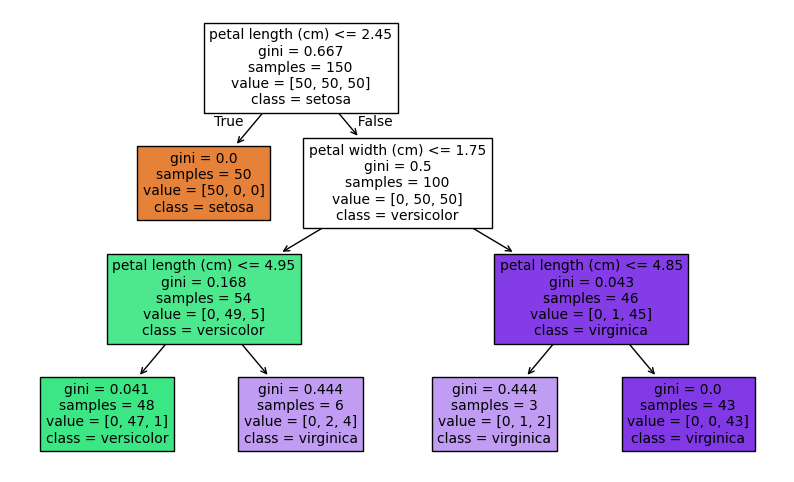

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data
X, y = load_iris(return_X_y=True)

# Train decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# Visualize
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=load_iris().feature_names, class_names=load_iris().target_names, filled=True)
plt.show()


**Pros:**
* Intuitive and easy to interpret
* Handles both numerical and categorical data
* No need for feature scaling

**Cons:**
* Can easily overfit
* Sensitive to noisy data

Predicted class for first sample: [0]


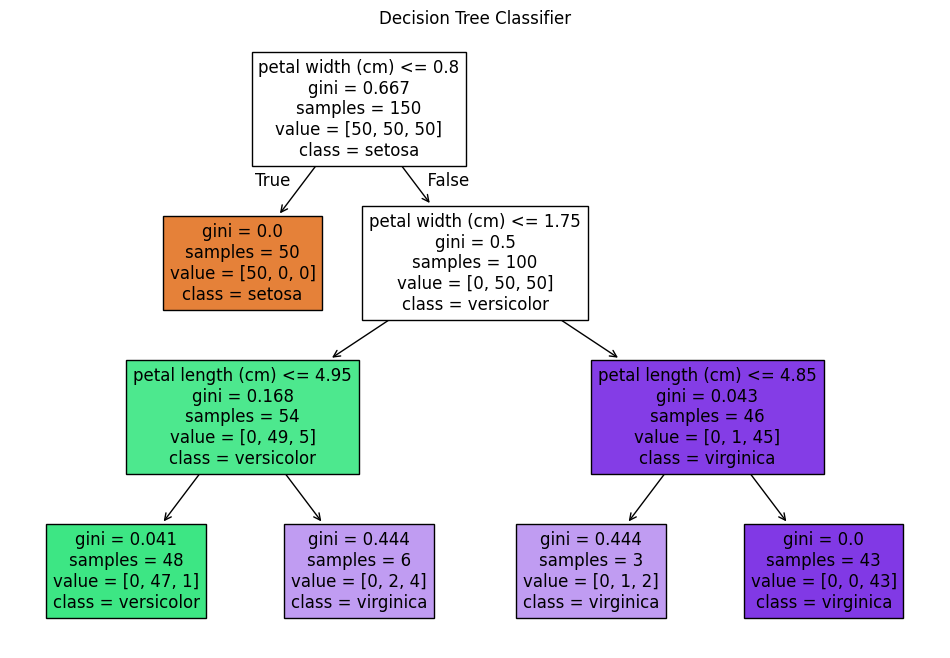

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample data
X, y = load_iris(return_X_y=True)

# Fit classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X, y)

# Predict
print("Predicted class for first sample:", clf.predict([X[0]]))

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=load_iris().feature_names, class_names=load_iris().target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()
